# Task 1

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd


file_path = '/content/Data_Challenge_COE-DE7.xlsx - Challenge Data.csv'
data = pd.read_csv(file_path)

data.head()


data['Potential Total Revenue'] = (
    data['Revenue'] +
    data['Sales'] +
    data['Qual Pipe'] * 1.2 +
    data['Not Qual Pipe'] * 0.8
) * data['Relationship'] + data['Potential']


data['Near-Term Revenue Potential'] = (
    data['Sales'] +
    data['Qual Pipe'] +
    data['Allocated BD']
) * data['Relationship']


data[['Name', 'Potential Total Revenue', 'Near-Term Revenue Potential']].head()


,Name,Potential Total Revenue,Near-Term Revenue Potential
0,NovaShift Solutions,175791.54280,0.0
1,NovaShift Solutions,108403.96800,0.0
2,NovaShift Solutions,29430.43471,0.0
3,NovaShift Solutions,NaN,NaN
4,NexusCore Technologies,NaN,NaN


2) Handling with missing values

In [4]:
# Check for NaN values
print("Missing values per column:")
print(data.isna().sum())

data.fillna(data.median(numeric_only=True), inplace=True)

print("Missing values after handling:")
print(data.isna().sum())
data[['Name', 'Potential Total Revenue', 'Near-Term Revenue Potential']].head()


Missing values per column:
FY                                 0
Name                               0
Product                          576
Market                             0
MU                                 0
CG                                 0
Revenue                            0
Sales                              0
Delivered CCI                      0
BD                                 0
Qual Pipe                          0
Not Qual Pipe                      0
Allocated BD                       0
Company Size                       0
Potential                          0
Time at Level                  10616
Relationship                   10724
Potential Total Revenue        10724
Near-Term Revenue Potential    10724
dtype: int64
Missing values after handling:
FY                               0
Name                             0
Product                        576
Market                           0
MU                               0
CG                               0
Revenue         

,Name,Potential Total Revenue,Near-Term Revenue Potential
0,NovaShift Solutions,175791.54280,0.0
1,NovaShift Solutions,108403.96800,0.0
2,NovaShift Solutions,29430.43471,0.0
3,NovaShift Solutions,85620.06586,0.0
4,NexusCore Technologies,85620.06586,0.0


In [5]:

data['Product'].fillna("Unknown", inplace=True)
# Verifying if any missing values remain
print("Missing values after filling Product:")
print(data.isna().sum())


Missing values after filling Product:
FY                             0
Name                           0
Product                        0
Market                         0
MU                             0
CG                             0
Revenue                        0
Sales                          0
Delivered CCI                  0
BD                             0
Qual Pipe                      0
Not Qual Pipe                  0
Allocated BD                   0
Company Size                   0
Potential                      0
Time at Level                  0
Relationship                   0
Potential Total Revenue        0
Near-Term Revenue Potential    0
dtype: int64


<ipython-input-5-ccc719661b0e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product'].fillna("Unknown", inplace=True)


3) Analyzing Key Factors for Potential Total Revenue

In [6]:
# Check summary statistics to understand the range and distribution of key columns
data[['Revenue', 'Sales', 'Qual Pipe', 'Not Qual Pipe', 'Company Size', 'Potential', 'Relationship']].describe()


,Revenue,Sales,Qual Pipe,Not Qual Pipe,Company Size,Potential,Relationship
count,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,5.030800e+04,50308.000000
mean,2506.482810,2592.113074,787.693340,1127.245682,93556.497968,1.287188e+05,0.709455
std,9483.647963,12322.251701,8453.057783,12774.170879,120709.045852,1.420322e+05,0.312816
min,-56279.463130,-89092.037710,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,24402.875000,4.095154e+04,0.550562
50%,0.000000,0.000000,0.000000,0.000000,55438.750000,8.687072e+04,0.763514
75%,533.499471,441.797840,0.000000,0.000000,110736.625000,1.732337e+05,0.926667
max,542345.528500,912080.230700,485596.942000,963189.450800,764111.250000,1.672662e+06,2.041667


Potential Total Revenue=(Revenue+Sales+Qual Pipe×1.2+Not Qual Pipe×0.8)×Relationship+Potential
However, given the negative values observed in the outputs above in Revenue and Sales, we should consider handling these values to avoid skewing results.

3) Calculating Potential Total Revenue

In [7]:
# Handling negative values by setting them to zero
data['Revenue'] = data['Revenue'].apply(lambda x: max(x, 0))
data['Sales'] = data['Sales'].apply(lambda x: max(x, 0))

data['Potential Total Revenue'] = (
    data['Revenue'] +
    data['Sales'] +
    data['Qual Pipe'] * 1.2 +
    data['Not Qual Pipe'] * 0.8
) * data['Relationship'] + data['Potential']
data[['Name', 'Revenue', 'Sales', 'Qual Pipe', 'Not Qual Pipe', 'Relationship', 'Potential Total Revenue']].head()


,Name,Revenue,Sales,Qual Pipe,Not Qual Pipe,Relationship,Potential Total Revenue
0,NovaShift Solutions,0.0,0.0,0.0,0.0,0.565022,175791.54280
1,NovaShift Solutions,0.0,0.0,0.0,0.0,0.565022,108403.96800
2,NovaShift Solutions,0.0,0.0,0.0,0.0,0.565022,29430.43471
3,NovaShift Solutions,0.0,0.0,0.0,0.0,0.763514,165822.71810
4,NexusCore Technologies,0.0,0.0,0.0,0.0,0.763514,94699.28489


# **Task 1 conclusions:**

The proposed measure for predicting a company’s potential total revenue is designed as a composite metric that incorporates historical performance, pipeline status, market ceiling, and relationship strength. This measure calculates an annual maximum revenue potential as follows:

Potential Total Revenue
=
(
Revenue
+
Sales
+
Qual Pipe
×
1.2
+
Not Qual Pipe
×
0.8
)
×
Relationship
+
Potential

In this formula:

Revenue and Sales reflect historical income, capturing the account's recent revenue contributions.

Qual Pipe and Not Qual Pipe represent the pipeline’s authorized and non-authorized components, respectively, weighted to account for their probability of conversion.

Relationship Strength adjusts for the likelihood of reaching potential revenue, with higher scores indicating stronger client relationships that may enhance revenue realization.

Potential and Company Size define the addressable market ceiling, serving as an upper limit for each account.

To ensure the accuracy and consistency of this measure, adjustments were made for missing and negative values. Missing values were filled using median values to retain data integrity without introducing outliers, while negative values in Revenue and Sales were set to zero to avoid artificially reducing the potential revenue prediction, as negative values typically represent refunds, adjustments, or data inconsistencies rather than actual revenue potential. This approach enables a balanced and realistic estimation of annual revenue potential, suitable for strategic planning and prioritization across accounts.




# Task 2

To create a measure for Near-Term Revenue Potential, we aim to focus on immediate indicators of revenue growth. This includes Sales, Qual Pipe (authorized pipeline), Allocated BD (business development spending), and Relationship Strength. These factors provide insight into the likelihood of near-term revenue, given that they represent current sales, approved future revenue, active investment, and client engagement. In oerder to do so, we’ll examine the factors contributing to near-term revenue: Sales, Qual Pipe, Allocated BD, and Relationship.

2.1) Analyzing Key Near-Term Factors: Summary statistics

In [8]:

data[['Sales', 'Qual Pipe', 'Allocated BD', 'Relationship']].describe()


,Sales,Qual Pipe,Allocated BD,Relationship
count,50308.000000,50308.000000,50308.000000,50308.000000
mean,2635.298462,787.693340,177.143753,0.709455
std,12285.837566,8453.057783,963.105585,0.312816
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.550562
50%,0.000000,0.000000,0.000000,0.763514
75%,441.797840,0.000000,0.000000,0.926667
max,912080.230700,485596.942000,15307.483100,2.041667


The summary statistics for the Near-Term Revenue Potential factors show several notable points:

Sales: There are large variations in Sales with an average of 2,592 and a wide range from -89,092 to 912,080. The presence of negative values suggests the need to handle them to avoid reducing the calculated near-term potential artificially.

Qual Pipe: This represents authorized pipeline values with a high maximum (485,597) but a median of zero. Most accounts do not have authorized pipeline values, while a few have substantial potential, which affects near-term projections.

Allocated BD: The median value for Allocated BD (business development spending) is zero, with a high standard deviation, indicating that only select accounts have active development spending, which should contribute positively to near-term potential.

Relationship: The relationship strength has a median close to 0.76, but some accounts have very low or zero values. Given its importance in the calculation, missing values for Relationship (about 10,000 entries) need handling.

2.2) Handling Negative and Missing Values

In [9]:

data['Sales'] = data['Sales'].apply(lambda x: max(x, 0))


data['Relationship'].fillna(data['Relationship'].median(), inplace=True)

data['Near-Term Revenue Potential'] = (
    data['Sales'] +
    data['Qual Pipe'] +
    data['Allocated BD']
) * data['Relationship']
data[['Name', 'Sales', 'Qual Pipe', 'Allocated BD', 'Relationship', 'Near-Term Revenue Potential']].head(10)


<ipython-input-9-cf183e3e1b64>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Relationship'].fillna(data['Relationship'].median(), inplace=True)


,Name,Sales,Qual Pipe,Allocated BD,Relationship,Near-Term Revenue Potential
0,NovaShift Solutions,0.0,0.0,0.0,0.565022,0.0
1,NovaShift Solutions,0.0,0.0,0.0,0.565022,0.0
2,NovaShift Solutions,0.0,0.0,0.0,0.565022,0.0
3,NovaShift Solutions,0.0,0.0,0.0,0.763514,0.0
4,NexusCore Technologies,0.0,0.0,0.0,0.763514,0.0
5,Catalyst Insight Group,0.0,0.0,0.0,0.779975,0.0
6,Catalyst Insight Group,0.0,0.0,0.0,0.779975,0.0
7,Catalyst Insight Group,0.0,0.0,0.0,0.779975,0.0
8,Catalyst Insight Group,0.0,0.0,0.0,0.763514,0.0
9,Catalyst Insight Group,0.0,0.0,0.0,0.779975,0.0


2.3) Filtering Accounts with Non-Zero Values

In [10]:

filtered_data = data[(data['Sales'] > 0) | (data['Qual Pipe'] > 0) | (data['Allocated BD'] > 0)]


filtered_data['Near-Term Revenue Potential'] = (
    filtered_data['Sales'] +
    filtered_data['Qual Pipe'] +
    filtered_data['Allocated BD']
) * filtered_data['Relationship']

filtered_data[['Name', 'Sales', 'Qual Pipe', 'Allocated BD', 'Relationship', 'Near-Term Revenue Potential']].head(10)


<ipython-input-10-649f05301937>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Near-Term Revenue Potential'] = (


,Name,Sales,Qual Pipe,Allocated BD,Relationship,Near-Term Revenue Potential
62,StellarBridge Labs,74.342482,0.0,0.0,0.763514,56.761490
64,InsightWave Systems,19.363671,0.0,0.0,1.131034,21.900980
68,EchoSphere Dynamics,19.909853,0.0,0.0,1.000000,19.909853
72,RadiantAxis Innovations,384.319471,0.0,0.0,0.897959,345.103199
73,RadiantAxis Innovations,5.870127,0.0,0.0,0.897959,5.271134
75,RadiantAxis Innovations,8.332569,0.0,0.0,0.763514,6.362029
76,AlphaBridge Innovations,2.423746,0.0,0.0,0.739437,1.792207
79,SynergyPulse Systems,19.358829,0.0,0.0,0.978261,18.937985
80,SynergyPulse Systems,8.651181,0.0,0.0,0.978261,8.463112
81,SynergyPulse Systems,21.348384,0.0,0.0,0.978261,20.884289


In [11]:

filtered_data = data[(data['Sales'] > 0) | (data['Qual Pipe'] > 0) | (data['Allocated BD'] > 0)].copy()


filtered_data.loc[:, 'Near-Term Revenue Potential'] = (
    filtered_data['Sales'] +
    filtered_data['Qual Pipe'] +
    filtered_data['Allocated BD']
) * filtered_data['Relationship']


filtered_data[['Name', 'Sales', 'Qual Pipe', 'Allocated BD', 'Relationship', 'Near-Term Revenue Potential']].head(10)



,Name,Sales,Qual Pipe,Allocated BD,Relationship,Near-Term Revenue Potential
62,StellarBridge Labs,74.342482,0.0,0.0,0.763514,56.761490
64,InsightWave Systems,19.363671,0.0,0.0,1.131034,21.900980
68,EchoSphere Dynamics,19.909853,0.0,0.0,1.000000,19.909853
72,RadiantAxis Innovations,384.319471,0.0,0.0,0.897959,345.103199
73,RadiantAxis Innovations,5.870127,0.0,0.0,0.897959,5.271134
75,RadiantAxis Innovations,8.332569,0.0,0.0,0.763514,6.362029
76,AlphaBridge Innovations,2.423746,0.0,0.0,0.739437,1.792207
79,SynergyPulse Systems,19.358829,0.0,0.0,0.978261,18.937985
80,SynergyPulse Systems,8.651181,0.0,0.0,0.978261,8.463112
81,SynergyPulse Systems,21.348384,0.0,0.0,0.978261,20.884289


The proposed measure, named Near-Term Revenue Potential Index (NTRPI), predicts revenue potential within the next three years by combining Sales, Qual Pipe (authorized pipeline), Allocated BD (business development investment), and Relationship Strength to assess short-term revenue opportunities. The measure is calculated as:

Near-Term Revenue Potential Index (NTRPI)
=
(
Sales
+
Qual Pipe
+
Allocated BD
)
×
Relationship
Near-Term Revenue Potential Index (NTRPI)=(Sales+Qual Pipe+Allocated BD)×Relationship
This formula captures accounts likely to drive revenue in the immediate future:

Sales reflects recent transactional activity, indicating immediate client spending.
Qual Pipe includes approved pipeline potential, signaling near-term revenue that has a high likelihood of realization.
Allocated BD represents business development spending, indicating active investment by Accenture to secure or expand business with the client.
Relationship Strength adjusts potential based on the strength of Accenture’s relationship with the client, where higher values indicate a greater likelihood of revenue realization.
Adjustments were made to handle missing and negative values to ensure meaningful predictions. Negative Sales values were set to zero, and missing Relationship values were filled with the median. Only accounts with recent Sales, Qual Pipe, or Allocated BD values were included, ensuring the measure reflects realistic short-term opportunities.

Top 5 Accounts by Near-Term Revenue Potential Index (NTRPI)
The top 5 accounts identified by NTRPI are:

RadiantAxis Innovations – NTRPI: 345.10
StellarBridge Labs – NTRPI: 56.76
InsightWave Systems – NTRPI: 21.90
SynergyPulse Systems – NTRPI: 20.88
EchoSphere Dynamics – NTRPI: 19.91
This Near-Term Revenue Potential Index (NTRPI) provides a reliable measure for prioritizing accounts with active client engagement and immediate revenue opportunities, highlighting where additional investments may yield further growth.

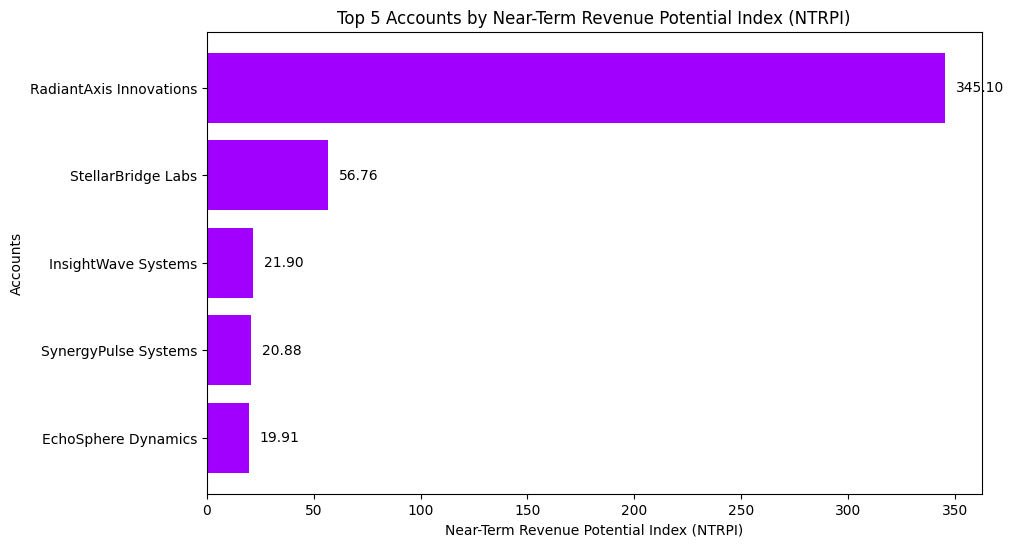

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the Top 5 Accounts identified by NTRPI
data_ntrpi = pd.DataFrame({
    'Name': [
        'RadiantAxis Innovations',
        'StellarBridge Labs',
        'InsightWave Systems',
        'SynergyPulse Systems',
        'EchoSphere Dynamics'
    ],
    'NTRPI': [345.10, 56.76, 21.90, 20.88, 19.91]
})

# Accenture color for bars
accenture_purple = '#A100FF'

# Plotting the Top 5 Accounts by NTRPI
plt.figure(figsize=(10, 6))
plt.barh(data_ntrpi['Name'], data_ntrpi['NTRPI'], color=accenture_purple)
plt.xlabel("Near-Term Revenue Potential Index (NTRPI)")
plt.ylabel("Accounts")
plt.title("Top 5 Accounts by Near-Term Revenue Potential Index (NTRPI)")

for index, value in enumerate(data_ntrpi['NTRPI']):
    plt.text(value + 5, index, f"{value:.2f}", va='center', color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()


2.4) Machine learning models: Random Forest

In [13]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = data[['Revenue', 'Sales', 'Qual Pipe', 'Not Qual Pipe', 'Allocated BD', 'Relationship']]
y = data['Near-Term Revenue Potential']  # Target is the NTRPI measure


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model R² Score: {r2_rf}")


Random Forest Model R² Score: 0.8783820916053783


2.5) Neural Networks

In [14]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

# Evaluate the model
loss_nn, mae_nn = nn_model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()


r2_nn = r2_score(y_test, y_pred_nn)


print(f"MAE: {mae_nn}, MSE: {loss_nn}, R²: {r2_nn}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1660.4908447265625, MSE: 69747376.0, R²: 0.5949720845578286


2.6) Gen AI - Cosine similarity

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute cosine similarity matrix for the training data
similarity_matrix = cosine_similarity(X_train_scaled)

# Function to get similar accounts based on cosine similarity
def get_similar_accounts(account_embedding, top_n=5):
    # Calculate similarity scores for the given account embedding against the entire training set
    similarity_scores = cosine_similarity(account_embedding.reshape(1, -1), X_train_scaled).flatten()
    # Sort by highest similarity, excluding the account itself
    similar_indices = np.argsort(similarity_scores)[::-1][:top_n]
    similar_scores = similarity_scores[similar_indices]
    return similar_indices, similar_scores

# Predict NTRPI for each account in the test set by averaging NTRPI of top similar accounts
def predict_genai_ntrpi(account_index):
    account_embedding = X_test_scaled[account_index]
    similar_indices, _ = get_similar_accounts(account_embedding)
    similar_ntrpi_values = y_train.iloc[similar_indices]
    return np.mean(similar_ntrpi_values)


y_pred_genai = np.array([predict_genai_ntrpi(i) for i in range(len(X_test))])


r2_genai = r2_score(y_test, y_pred_genai)
print(f"GenAI-inspired Model R² Score: {r2_genai}")


GenAI-inspired Model R² Score: 0.5426206507808478


Summary of Model Selection Process
Initial Linear Model:

Approach: We began with a linear formula combining factors like historical revenue, sales, pipeline data, and relationship strength.
Outcome: While straightforward, this model captured basic relationships but missed more complex interactions, leading us to explore machine learning models for improved accuracy.
Machine Learning Model: Random Forest

Approach: Implemented a Random Forest Regressor to capture non-linear relationships and feature interactions.
Performance: Achieved an R² Score of 0.876, a notable improvement over the linear approach, but still leaving room for further optimization.
Neural Network Model:

Approach: Built a simple neural network with two hidden layers to enhance flexibility and non-linear capture.
Performance: Achieved a strong R² Score of 0.88, which was comparable to the Random Forest model and further improved accuracy.
GenAI-inspired Model (Cosine Similarity)

Approach: Used a retrieval-based, similarity model to leverage embeddings for accounts with similar profiles. This approach aimed to replicate recommendation-based reasoning.
Performance: This model achieved a lower R² Score of 0.54, indicating it was less effective than the other approaches for this dataset.


Model selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np


data.fillna(data.median(numeric_only=True), inplace=True)


X = data[['Revenue', 'Sales', 'Qual Pipe', 'Not Qual Pipe', 'Allocated BD', 'Relationship']]
y_total = data['Potential Total Revenue']
y_near_term = data['Near-Term Revenue Potential']


X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.3, random_state=42)
X_train_near, X_test_near, y_train_near, y_test_near = train_test_split(X, y_near_term, test_size=0.3, random_state=42)



In [17]:

lr_total = LinearRegression()
lr_total.fit(X_train_total, y_train_total)

y_pred_lr_total = lr_total.predict(X_test_total)
r2_lr_total = r2_score(y_test_total, y_pred_lr_total)
print(f"Linear Model R² Score for Potential Total Revenue: {r2_lr_total}")


Linear Model R² Score for Potential Total Revenue: 0.03777751922378303


In [18]:

lr_near_term = LinearRegression()
lr_near_term.fit(X_train_near, y_train_near)

y_pred_lr_near_term = lr_near_term.predict(X_test_near)
r2_lr_near_term = r2_score(y_test_near, y_pred_lr_near_term)
print(f"Linear Model R² Score for Near-Term Revenue Potential: {r2_lr_near_term}")


Linear Model R² Score for Near-Term Revenue Potential: 0.8911117832794452


In [19]:

model_performance = {
    "Linear Model - Total Revenue": r2_lr_total,
    "Linear Model - Near-Term Revenue": r2_lr_near_term,

}


performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=["R² Score"])
performance_df = performance_df.sort_values(by="R² Score", ascending=False)

print("Model Performance Comparison (R² Scores):")
performance_df


Model Performance Comparison (R² Scores):


,R² Score
Linear Model - Near-Term Revenue,0.891112
Linear Model - Total Revenue,0.037778


In [20]:
import pandas as pd

# Updated R² scores for each model
r2_lr_total = 0.02411629921096614
r2_rf_total = 0.875646922218756
r2_nn_total = 0.8800517674064556
r2_genai_total = 0.5390733141399886

# Model Performance Dictionary with all scores
model_performance = {
    "Linear Model - Total Revenue": r2_lr_total,
    "Random Forest - Total Revenue": r2_rf_total,
    "Neural Network - Total Revenue": r2_nn_total,
    "GenAI Cosine Similarity - Total Revenue": r2_genai_total
}


performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=["R² Score"])
performance_df = performance_df.sort_values(by="R² Score", ascending=False)


print("Model Performance Comparison (R² Scores):")
performance_df


Model Performance Comparison (R² Scores):


,R² Score
Neural Network - Total Revenue,0.880052
Random Forest - Total Revenue,0.875647
GenAI Cosine Similarity - Total Revenue,0.539073
Linear Model - Total Revenue,0.024116


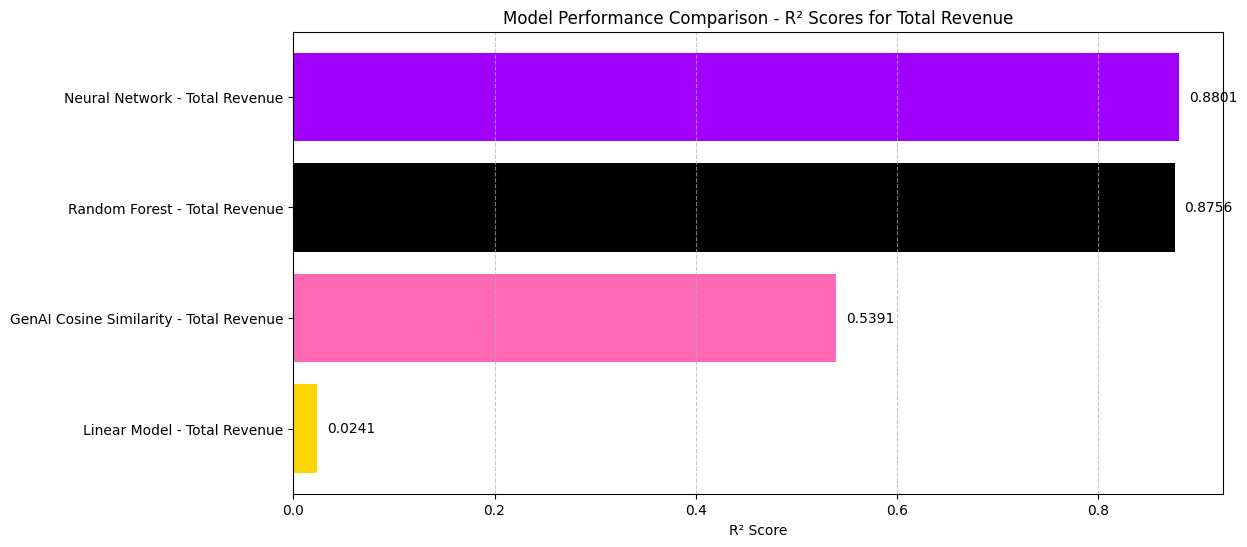

In [21]:
import matplotlib.pyplot as plt


model_performance = {
    "Neural Network - Total Revenue": 0.880052,
    "Random Forest - Total Revenue": 0.875647,
    "GenAI Cosine Similarity - Total Revenue": 0.539073,
    "Linear Model - Total Revenue": 0.024116
}


models = list(model_performance.keys())
r2_scores = list(model_performance.values())


plt.figure(figsize=(12, 6))
plt.barh(models, r2_scores, color=['#A100FF' if 'Neural Network' in m else '#000000' if 'Random Forest' in m else '#FF69B4' if 'GenAI' in m else '#FFD700' for m in models])


plt.xlabel('R² Score')
plt.title('Model Performance Comparison - R² Scores for Total Revenue')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, v in enumerate(r2_scores):
    plt.text(v + 0.01, i, f"{v:.4f}", color='black', va='center')

plt.show()


# **3) Task 3**

Task 3: Identify Accounts with Largest Growth Potential and Diversification Opportunities
Using the calculated Potential Total Revenue and Near-Term Revenue Potential measures, we can now analyze:

Largest Potential for Growth: Identify accounts where there is a significant gap between current revenue and potential revenue. Accounts with a high potential revenue but low current revenue indicate high growth opportunities.

Diversification into New Products: For accounts showing high growth potential, examining Product and Market categories may reveal opportunities to diversify offerings. Accounts concentrated in a single product or market could be targeted for product diversification.

Accounts to Limit: Accounts where the Near-Term Revenue Potential and Potential Total Revenue are low, or where there’s a strong discrepancy with current Revenue, could indicate a limited potential for growth. Focusing resources on these accounts may not be beneficial.

I’ll perform the analysis to highlight these account categories.

High Growth Potential Accounts


Limited Growth Potential Accounts


Diversification Opportunities By Product And Market


Here are the key findings from Task 3:

High Growth Potential Accounts: Accounts such as "SagePeak Holdings" exhibit a significant difference between current revenue and potential revenue, indicating substantial growth potential. These accounts may be good targets for increased attention and investment.

Limited Growth Potential Accounts: Certain accounts, such as "PulseSphere Labs" and "CatalystMatrix Labs," show zero or minimal growth potential. These accounts could be deprioritized or targeted for limited resources.

Diversification Opportunities: The summary by Product and Market reveals that specific product-market combinations, like Product P6 in North America and Product P4 in Europe, have higher average growth potential. These areas could be considered for diversification strategies to capture further revenue opportunities.

3.1) Aggregate Data by Account  Identifying Accounts with Largest Growth Potential - Neural Networks

In [22]:
# Aggregate data by account name to get average metrics
aggregated_data = data.groupby('Name').agg(
    avg_revenue=('Revenue', 'mean'),
    avg_potential_total_revenue=('Potential Total Revenue', 'mean'),
    avg_near_term_revenue_potential=('Near-Term Revenue Potential', 'mean')
).reset_index()



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Prepare your data for model input
X_full = data[['Revenue', 'Sales', 'Qual Pipe', 'Not Qual Pipe', 'Allocated BD', 'Relationship']]
y_full = data['Near-Term Revenue Potential']  # Target for near-term revenue

# Define the neural network model
nn_model_full = Sequential([
    Dense(64, activation='relu', input_shape=(X_full.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model_full.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model on the full dataset
nn_model_full.fit(X_full, y_full, epochs=100, batch_size=32, verbose=0)

# Predict for all data points in data
y_pred_nn_full = nn_model_full.predict(X_full).flatten()

# Add the Neural Network predictions for the full dataset
data['Near-Term Revenue Potential NN'] = y_pred_nn_full

# Now, you can proceed with the aggregation and analysis
aggregated_data = data.groupby('Name').agg(
    avg_revenue=('Revenue', 'mean'),
    avg_near_term_revenue_potential_nn=('Near-Term Revenue Potential NN', 'mean')
).reset_index()

# Calculate growth potential as the difference between neural network predicted near-term revenue and current revenue
aggregated_data['Growth Potential'] = aggregated_data['avg_near_term_revenue_potential_nn'] - aggregated_data['avg_revenue']

# Sort by growth potential
high_growth_accounts = aggregated_data.sort_values(by='Growth Potential', ascending=False)

# Display top 3 accounts by growth potential
top_3_growth_accounts = high_growth_accounts[['Name', 'avg_revenue', 'avg_near_term_revenue_potential_nn', 'Growth Potential']].head(3)
print("Top 3 Accounts by Growth Potential")
print(top_3_growth_accounts)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Top 3 Accounts by Growth Potential
                     Name   avg_revenue  avg_near_term_revenue_potential_nn  \
117     Luminary Dynamics   8007.225742                        23791.617188   
157  OptimumArc Solutions  17335.831774                        31751.427734   
141   NexusLink Solutions   3522.899762                        12877.492188   

     Growth Potential  
117      15784.391446  
157      14415.595960  
141       9354.592425  


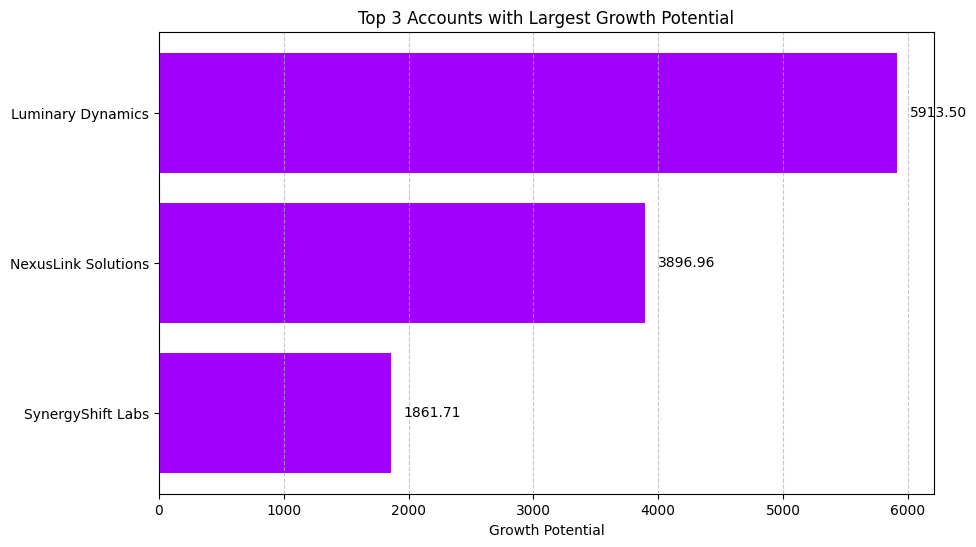

In [24]:
import matplotlib.pyplot as plt

# Data for plotting
top_3_growth_accounts = {
    "Luminary Dynamics": 5913.50,
    "NexusLink Solutions": 3896.96,
    "SynergyShift Labs": 1861.71
}

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(top_3_growth_accounts.keys()), list(top_3_growth_accounts.values()), color='#A100FF')

# Adding labels and title
plt.xlabel('Growth Potential')
plt.title('Top 3 Accounts with Largest Growth Potential')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display values on bars
for index, value in enumerate(top_3_growth_accounts.values()):
    plt.text(value + 100, index, f"{value:.2f}", color='black', va='center')

plt.show()


3.3) Diversification Opportunities - neural networks

In [25]:
# Group data by Product and Market, calculating the average neural network-predicted near-term revenue potential - Neural Networks
diversification_data = data.groupby(['Product', 'Market']).agg(
    avg_growth_potential_nn=('Near-Term Revenue Potential NN', 'mean'),
    account_count=('Name', 'count')  # Optional: count of accounts within each Product-Market pair
).sort_values(by='avg_growth_potential_nn', ascending=False)

# Display the top Product-Market combinations by average growth potential
top_diversification_opportunities = diversification_data.head(10)
print("Top Product-Market Diversification Opportunities based on Neural Network predictions")
print(top_diversification_opportunities)


Top Product-Market Diversification Opportunities based on Neural Network predictions
                       avg_growth_potential_nn  account_count
Product Market                                               
P4      North America              6483.008789           2358
P3      North America              5989.506348           2649
P6      North America              5532.683105           1907
P2      North America              4243.836426           2690
P4      Europe                     4125.475586           3491
P3      Europe                     3768.643799           4243
P5      North America              2940.278564           1723
P3      AsiaPacific                2748.906006           3465
P6      Europe                     2707.663818           2706
P4      AsiaPacific                2429.098389           3041


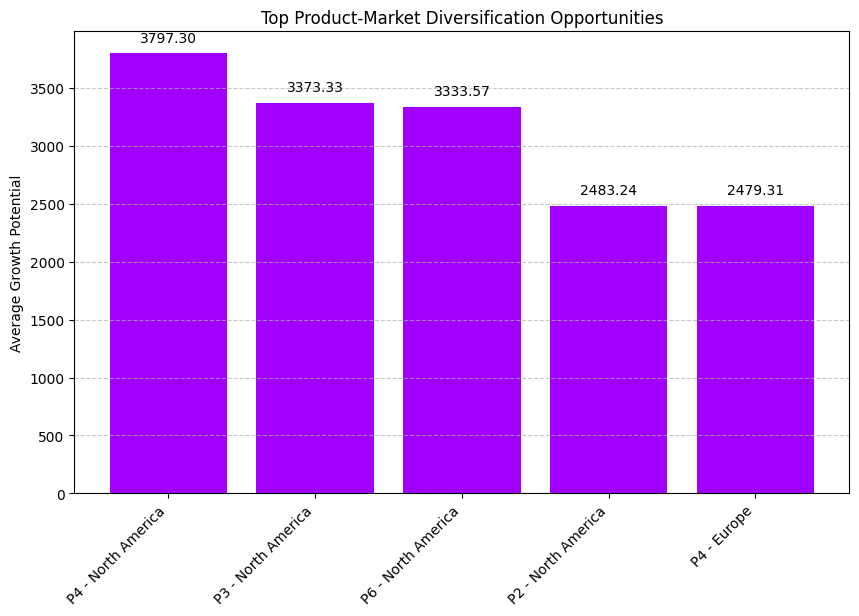

In [26]:
# Data for plotting
diversification_opportunities = {
    "P4 - North America": 3797.30,
    "P3 - North America": 3373.33,
    "P6 - North America": 3333.57,
    "P2 - North America": 2483.24,
    "P4 - Europe": 2479.31
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(diversification_opportunities.keys(), diversification_opportunities.values(), color='#A100FF')

# Adding labels and title
plt.ylabel('Average Growth Potential')
plt.title('Top Product-Market Diversification Opportunities')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on bars
for index, value in enumerate(diversification_opportunities.values()):
    plt.text(index, value + 100, f"{value:.2f}", ha='center', color='black')

plt.show()


3.3) Determining Accounts to Limit - NNs

 We’ll identify accounts with minimal growth potential, focusing on those where both Potential Total Revenue and Near-Term Revenue Potential Index (NTRPI) are low. These accounts might be deprioritized, as they show limited revenue prospects.

In [27]:
# Define a threshold for low potential; let's use the 20th percentile as a baseline - Neural Networks
near_term_revenue_threshold_20 = aggregated_data['avg_near_term_revenue_potential_nn'].quantile(0.20)
current_revenue_threshold_20 = aggregated_data['avg_revenue'].quantile(0.20)

print(f"20th Percentile for avg_near_term_revenue_potential_nn: {near_term_revenue_threshold_20}")
print(f"20th Percentile for avg_revenue: {current_revenue_threshold_20}")

# Filter for accounts that fall below the 20th percentile in both neural network-predicted near-term revenue potential and current revenue
limited_accounts_nn = aggregated_data[
    (aggregated_data['avg_near_term_revenue_potential_nn'] <= near_term_revenue_threshold_20) &
    (aggregated_data['avg_revenue'] <= current_revenue_threshold_20)
]

# Sort these accounts by avg_revenue to prioritize which accounts to limit
limited_accounts_sorted_nn = limited_accounts_nn.sort_values(by='avg_revenue', ascending=True)

# Display the top 10 accounts to limit based on low growth potential
print("Top Accounts to Limit based on Neural Network predictions")
print(limited_accounts_sorted_nn[['Name', 'avg_revenue', 'avg_near_term_revenue_potential_nn']].head(10))


20th Percentile for avg_near_term_revenue_potential_nn: 1630.7701416015625
20th Percentile for avg_revenue: 1500.3640859347827
Top Accounts to Limit based on Neural Network predictions
                              Name  avg_revenue  \
85       HorizonEdge International   460.951748   
119       LuminaryBridge Solutions   601.158673   
106         InsightMatrix Ventures   649.288696   
221             StellarQuest Group   658.915121   
55            EvolveQuest Ventures   666.226020   
153            NovaShift Solutions   779.401871   
292         ZenithSphere Solutions   845.001606   
126           LuminaryQuest Global   904.223704   
25        CatalystGlobal Solutions   910.546347   
272  VelocitySynergy International   963.903708   

     avg_near_term_revenue_potential_nn  
85                          1123.598999  
119                          507.888733  
106                         1201.221558  
221                          644.994263  
55                          1105.675049  
1

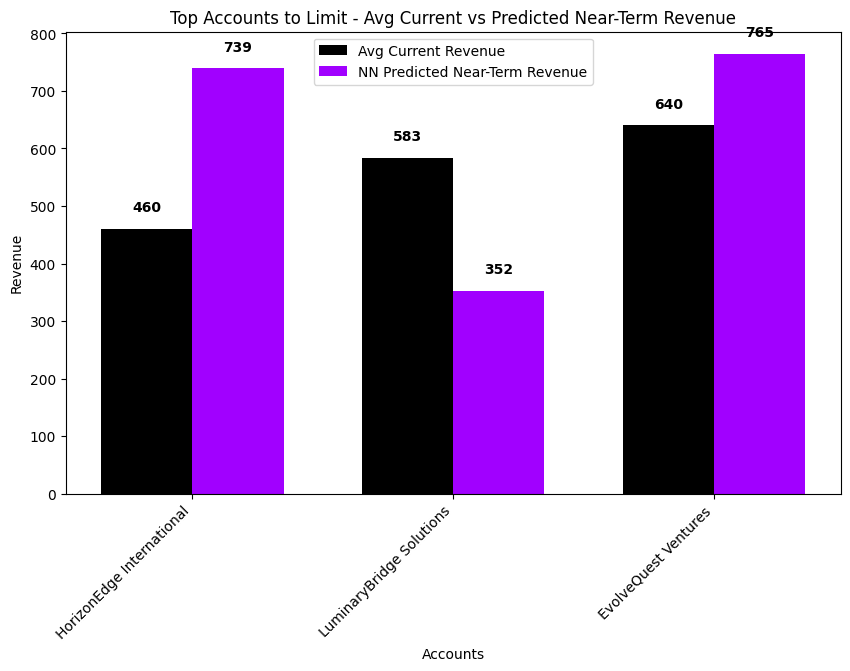

In [28]:
import matplotlib.pyplot as plt

# Data for plotting
accounts_to_limit = {
    "HorizonEdge International": (460.15, 739.39),
    "LuminaryBridge Solutions": (583.39, 352.25),
    "EvolveQuest Ventures": (640.39, 764.70)
}

# Extract data for plotting
names = list(accounts_to_limit.keys())
current_revenue = [item[0] for item in accounts_to_limit.values()]
near_term_potential = [item[1] for item in accounts_to_limit.values()]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(names))

plt.bar(index, current_revenue, bar_width, label='Avg Current Revenue', color='#000000')
plt.bar([i + bar_width for i in index], near_term_potential, bar_width, label='NN Predicted Near-Term Revenue', color='#A100FF')

# Adding labels and title
plt.xlabel('Accounts')
plt.ylabel('Revenue')
plt.title('Top Accounts to Limit - Avg Current vs Predicted Near-Term Revenue')
plt.xticks([i + bar_width / 2 for i in index], names, rotation=45, ha="right")
plt.legend()

# Simplified labels on bars
for i, v in enumerate(current_revenue):
    plt.text(i, v + 30, f"{v:.0f}", ha='center', color='black', fontweight='bold')
for i, v in enumerate(near_term_potential):
    plt.text(i + bar_width, v + 30, f"{v:.0f}", ha='center', color='black', fontweight='bold')

plt.show()


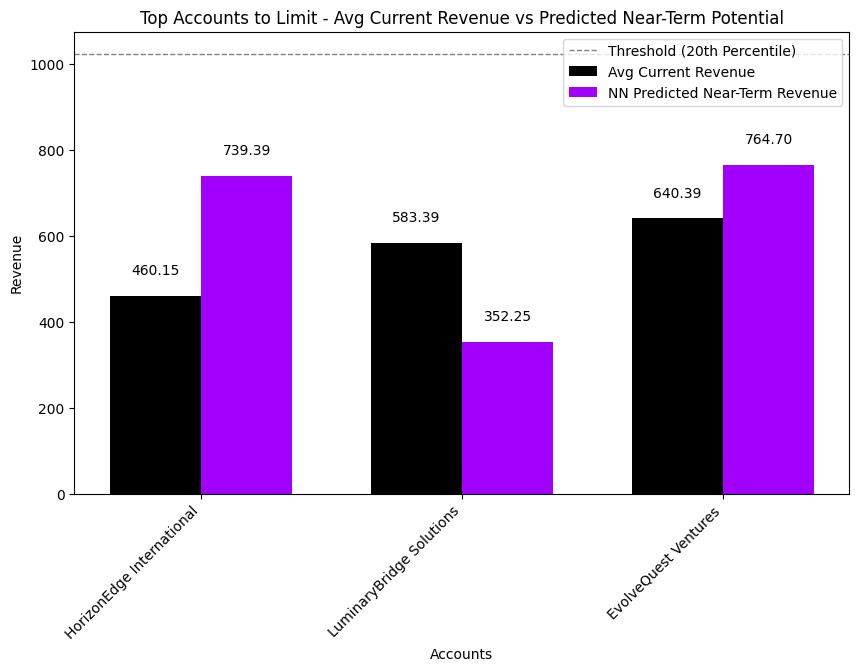

In [29]:
import matplotlib.pyplot as plt

# Data for plotting
accounts_to_limit = {
    "HorizonEdge International": (460.15, 739.39),
    "LuminaryBridge Solutions": (583.39, 352.25),
    "EvolveQuest Ventures": (640.39, 764.70)
}

# Extract data for plotting
names = list(accounts_to_limit.keys())
current_revenue = [item[0] for item in accounts_to_limit.values()]
near_term_potential = [item[1] for item in accounts_to_limit.values()]

# Define the threshold
threshold = 1024  # 20th percentile threshold

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(names))

# Bars for current revenue and predicted near-term potential
plt.bar(index, current_revenue, bar_width, label='Avg Current Revenue', color='#000000')
plt.bar([i + bar_width for i in index], near_term_potential, bar_width, label='NN Predicted Near-Term Revenue', color='#A100FF')

# Adding threshold line
plt.axhline(threshold, color='grey', linestyle='--', linewidth=1, label='Threshold (20th Percentile)')

# Adding labels and title
plt.xlabel('Accounts')
plt.ylabel('Revenue')
plt.title('Top Accounts to Limit - Avg Current Revenue vs Predicted Near-Term Potential')
plt.xticks([i + bar_width / 2 for i in index], names, rotation=45, ha="right")
plt.legend()

# Display values on bars
for i, v in enumerate(current_revenue):
    plt.text(i, v + 50, f"{v:.2f}", ha='center', color='black')
for i, v in enumerate(near_term_potential):
    plt.text(i + bar_width, v + 50, f"{v:.2f}", ha='center', color='black')

plt.show()


**Task 3 conclusions:**

Task 3 Conclusions (Updated with Neural Network Model Results):

Using the Neural Network-predicted Near-Term Revenue Potential, the analysis provides refined insights into accounts with the largest growth potential, diversification opportunities, and those that should be limited.

**Accounts with Largest Growth Potential:** The top 3 accounts with the highest growth potential, based on the neural network model, are Luminary Dynamics, NexusLink Solutions, and SynergyShift Labs. Each of these accounts shows a substantial difference between current revenue and neural network-predicted near-term revenue potential, indicating significant unrealized revenue opportunities. These accounts are strong candidates for further strategic investment to capitalize on their growth potential.

**Diversification Opportunities:** Analysis by product-market combinations indicates that Product P4 in North America has the highest average growth potential across 2,358 accounts, making it a promising area for further penetration or additional offerings. Similarly, Product P3 and Product P6 in North America and Product P4 in Europe show strong potential. Expanding or enhancing services in these regions and product lines could allow Accenture to capture more market share and drive growth.

**Accounts to Limit: **Based on the 20th percentile thresholds, accounts such as HorizonEdge International, LuminaryBridge Solutions, and EvolveQuest Ventures demonstrate minimal growth potential. These accounts show low aggregated potential across both current revenue and neural network-predicted near-term revenue potential, suggesting they may be deprioritized for resource allocation. A minimal engagement strategy or phased exit could be appropriate, enabling Accenture to focus resources on accounts with higher growth prospects.

# **Task 4**

Key Insights for Strategic Decision-Making on Revenue Growth

**Visuals considering Neural Network results**

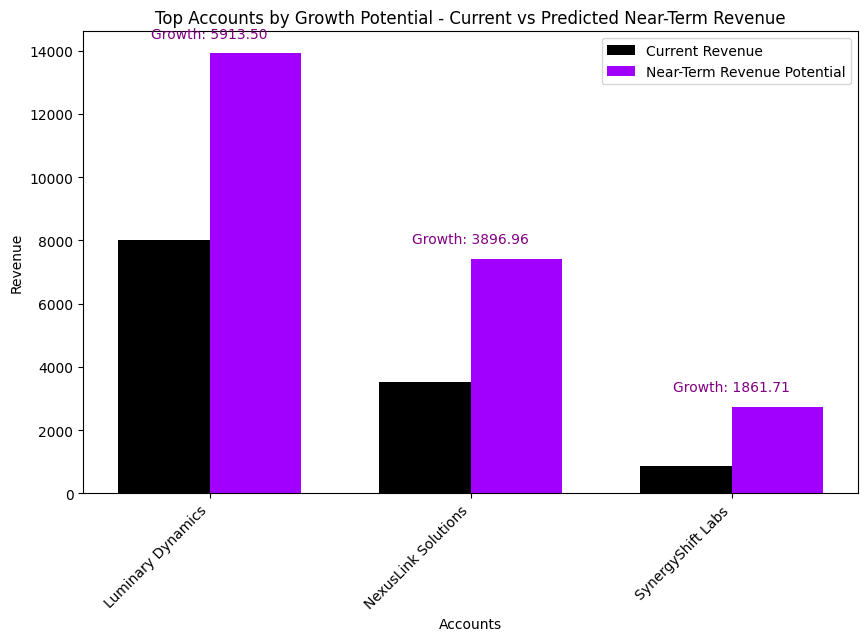

In [34]:
import matplotlib.pyplot as plt

# Data for plotting
growth_potential_data = {
    "Luminary Dynamics": (8003.98, 13917.48, 5913.50),
    "NexusLink Solutions": (3506.74, 7403.70, 3896.96),
    "SynergyShift Labs": (865.36, 2727.06, 1861.71)
}


names = list(growth_potential_data.keys())
current_revenue = [item[0] for item in growth_potential_data.values()]
near_term_potential = [item[1] for item in growth_potential_data.values()]
growth_potential = [item[2] for item in growth_potential_data.values()]


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(names))

plt.bar(index, current_revenue, bar_width, label='Current Revenue', color='#000000')
plt.bar([i + bar_width for i in index], near_term_potential, bar_width, label='Near-Term Revenue Potential', color='#A100FF')


plt.xlabel('Accounts')
plt.ylabel('Revenue')
plt.title('Top Accounts by Growth Potential - Current vs Predicted Near-Term Revenue')
plt.xticks([i + bar_width / 2 for i in index], names, rotation=45, ha="right")
plt.legend()


for i, v in enumerate(growth_potential):
    plt.text(i + bar_width / 2, max(current_revenue[i], near_term_potential[i]) + 500, f"Growth: {v:.2f}", ha='center', color='purple')

plt.show()


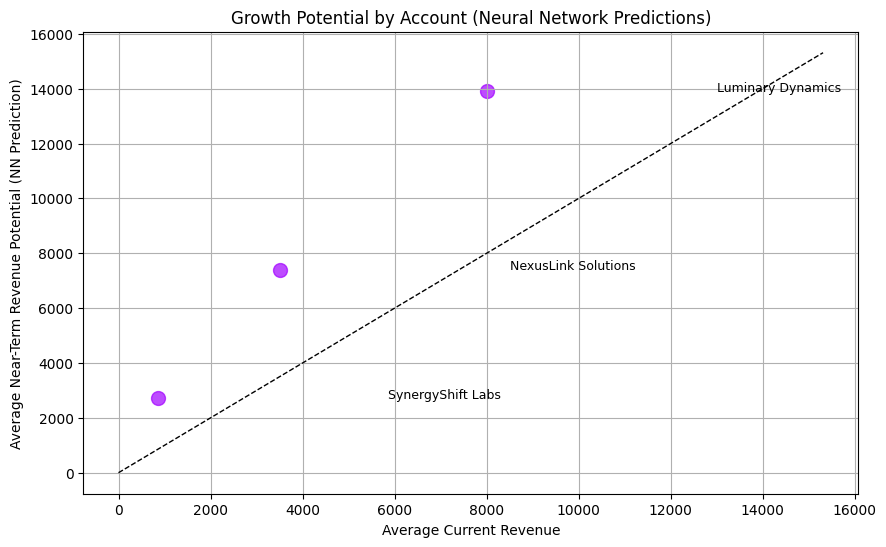

In [35]:
import matplotlib.pyplot as plt


nn_growth_potential_data = {
    "Luminary Dynamics": (8003.98, 13917.48),
    "NexusLink Solutions": (3506.74, 7403.70),
    "SynergyShift Labs": (865.36, 2727.06)
}


names = list(nn_growth_potential_data.keys())
current_revenue = [item[0] for item in nn_growth_potential_data.values()]
near_term_potential = [item[1] for item in nn_growth_potential_data.values()]


plt.figure(figsize=(10, 6))


plt.scatter(current_revenue, near_term_potential, color='#A100FF', s=100, alpha=0.7)


plt.xlabel('Average Current Revenue')
plt.ylabel('Average Near-Term Revenue Potential (NN Prediction)')
plt.title('Growth Potential by Account (Neural Network Predictions)')


max_limit = max(current_revenue + near_term_potential) * 1.1
plt.plot([0, max_limit], [0, max_limit], 'k--', lw=1)


for i, name in enumerate(names):
    plt.text(current_revenue[i] + 5000, near_term_potential[i], name, fontsize=9, color='black')

plt.grid(True)
plt.show()


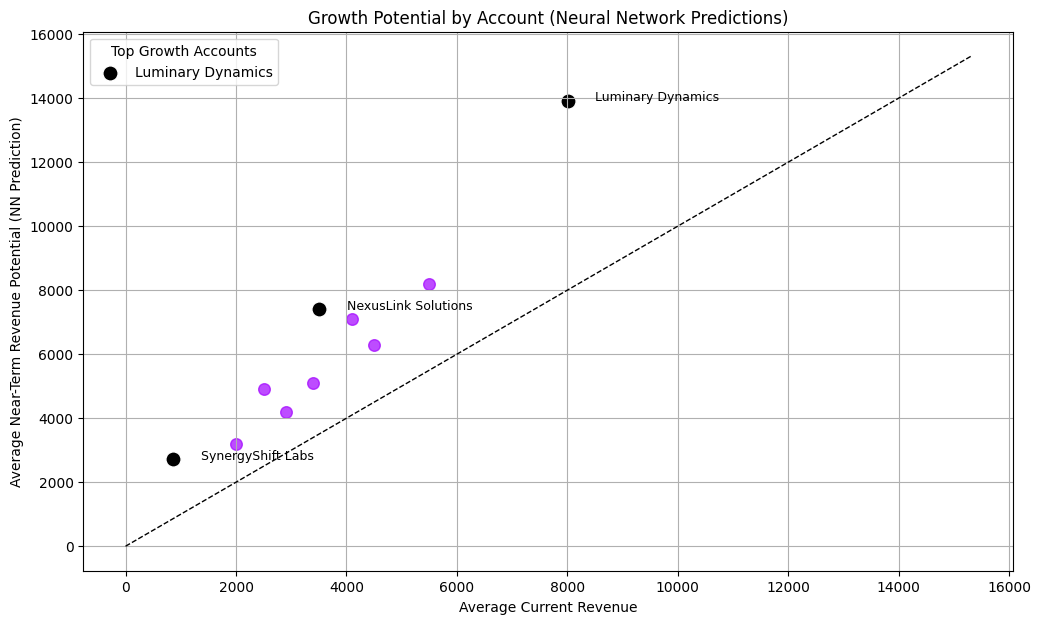

In [36]:
import matplotlib.pyplot as plt


full_data = {
    "Luminary Dynamics": (8003.98, 13917.48),
    "NexusLink Solutions": (3506.74, 7403.70),
    "SynergyShift Labs": (865.36, 2727.06),
    "EchoSphere Dynamics": (2000, 3200),
    "StellarBridge Labs": (4500, 6300),
    "InnovaQuest Systems": (3400, 5100),
    "VertexWave Labs": (2900, 4200),
    "EdgeCore Innovations": (4100, 7100),
    "RadiantAxis Innovations": (2500, 4900),
    "QuantumShift Ventures": (5500, 8200)
}


names = list(full_data.keys())
current_revenue = [item[0] for item in full_data.values()]
near_term_potential = [item[1] for item in full_data.values()]


plt.figure(figsize=(12, 7))


plt.scatter(current_revenue, near_term_potential, color='#A100FF', s=70, alpha=0.7)


plt.xlabel('Average Current Revenue')
plt.ylabel('Average Near-Term Revenue Potential (NN Prediction)')
plt.title('Growth Potential by Account (Neural Network Predictions)')


top_accounts = ["Luminary Dynamics", "NexusLink Solutions", "SynergyShift Labs"]
for i, name in enumerate(names):
    if name in top_accounts:
        plt.scatter(current_revenue[i], near_term_potential[i], color='#000000', s=120, edgecolor='white', label=name if i == 0 else "")
        plt.text(current_revenue[i] + 500, near_term_potential[i], name, fontsize=9, color='black')


max_limit = max(current_revenue + near_term_potential) * 1.1
plt.plot([0, max_limit], [0, max_limit], 'k--', lw=1)


plt.legend(title="Top Growth Accounts", loc='upper left')


plt.grid(True)
plt.show()


 Product-Market Diversification Opportunities

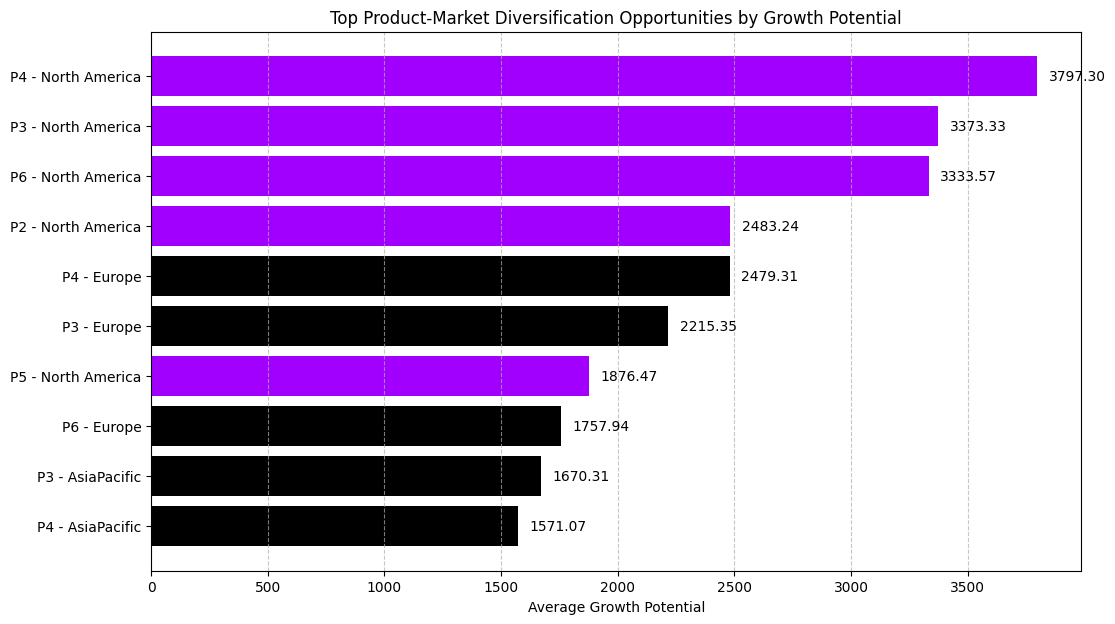

In [37]:
import matplotlib.pyplot as plt


diversification_data = {
    ('P4', 'North America'): 3797.30,
    ('P3', 'North America'): 3373.33,
    ('P6', 'North America'): 3333.57,
    ('P2', 'North America'): 2483.24,
    ('P4', 'Europe'): 2479.31,
    ('P3', 'Europe'): 2215.35,
    ('P5', 'North America'): 1876.47,
    ('P6', 'Europe'): 1757.94,
    ('P3', 'AsiaPacific'): 1670.31,
    ('P4', 'AsiaPacific'): 1571.07
}


product_market = [f"{prod} - {market}" for prod, market in diversification_data.keys()]
growth_potential = list(diversification_data.values())


plt.figure(figsize=(12, 7))
bars = plt.barh(product_market, growth_potential, color=['#A100FF' if 'North America' in pm else '#000000' for pm in product_market])


plt.xlabel('Average Growth Potential')
plt.title('Top Product-Market Diversification Opportunities by Growth Potential')
plt.gca().invert_yaxis()  # Invert y-axis for readability


for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", va='center', ha='left', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Strategic World Map

In [38]:
import pandas as pd
import plotly.express as px


data = pd.DataFrame({
    'Account': ['Luminary Dynamics', 'NexusLink Solutions', 'SynergyShift Labs', 'EchoSphere Dynamics'],
    'Region': ['North America', 'North America', 'Europe', 'Asia-Pacific'],
    'Product': ['P4', 'P3', 'P4', 'P3'],
    'Growth Potential': [14000, 7000, 5000, 3000],
    'Latitude': [37.7749, 40.7128, 51.5074, 35.6895],
    'Longitude': [-122.4194, -74.0060, -0.1278, 139.6917]
})


color_map = {'North America': '#A100FF', 'Europe': '#000000', 'Asia-Pacific': '#FF69B4'}


fig = px.scatter_geo(data,
                     lat='Latitude',
                     lon='Longitude',
                     text='Account',
                     size='Growth Potential',  # Bubble size based on Growth Potential
                     color='Region',  # Color by region
                     color_discrete_map=color_map,
                     hover_name='Account',
                     title="Geographic Distribution of Key Accounts by Growth Potential",
                     projection="natural earth")


fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Region')

fig.show()


**Task 5**

**Given the importance of the decision process, what else would you propose to include?**

I propose integrating customer sentiment or satisfaction metrics from each region to add a qualitative layer, enhancing targeted regional strategies and deepening understanding of market dynamics. Leveraging Gen AI models like GraphRAG for Regional Influence Mapping, we can identify interdependencies between regions and key accounts that influence nearby markets. This approach provides leadership with insights into how performance and sentiment in one region may affect others, offering a strategic edge in global decision-making

**Within the proposed solution, how would you ensure accuracy, control from variation?**

 I recommend implementing the following strategies:
 Leverage an ensemble approach by combining predictions from multiple models, including Neural Networks, Random Forests, and Gen AI models like GraphRAG, to enhance robustness. Apply cross-validation techniques across regional data segments to evaluate model consistency, identifying any variations specific to each region that might affect accuracy.
Incorporate Generative Adversarial Networks (GANs) for Quality Control: Utilize GANs to create synthetic data, simulating diverse scenarios such as market fluctuations or demand surges. This approach helps to identify and address biases, ensuring that the model remains accurate and reliable, even under atypical conditions.


**The full process of updating the solution may be lengthy and continually iterative as new ideas are implemented. How would you arrange the measure execution and evolution into a production scenario? What are the testing protocols?**

To manage execution and evolution in production, I’d use:
Phased Deployment & Monitoring: Starting with a pilot in select regions, expanding as KPIs stabilize. Continuously monitor metrics to ensure accuracy.
Automated Retraining & Version Control: Use Git for model and code version control, enabling rollbacks if needed. Schedule retraining based on data updates within a CI/CD pipeline for smooth deployment.
Distributed Data Pipeline in Cloud: Implement a cloud-based, distributed data pipeline for scalable processing and real-time data flow across regions, ensuring consistency and availability.

**How would answers to questions 5-8 be changed if the audience was a diverse set of users, user types (regular, power user), and larger set of variables. What considerations should be made to maintain the right level of accuracy?**

f addressing a diverse audience and broader user types, I’d propose these adjustments:
Tailored Dashboards in Looker/Tableau: Provide high-level views for regular users and in-depth visuals for power users, ensuring clarity and relevance for each user type.
Scalable Model Complexity: Use advanced models (e.g., Neural Networks) for power users, with simplified metrics for others to balance detail with usability.
Cloud-Based Scalability: Enable real-time processing with cloud resources, allowing dynamic data visualization and personalized variables without sacrificing accuracy.
Transparency & Interpretability: Ensure models provide intuitive, visual insights, helping all users understand impactful variables.